## API- Cotações Cambiais

Fonte: https://fred.stlouisfed.org/

Precisamos de uma key para consumir a API. Para isso, é necessário criar uma conta no site e gerar uma key. 
A key é um código que identifica o usuário e permite o acesso à API. Este é um cenário muito comum, pois muitas APIs são pagas e precisam de uma key para serem consumidas. Neste caso, a API é gratuita e a key é gerada automaticamente.

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

In [3]:
#!pip install python-dotenv

In [4]:
#Importação dos módulos

from dotenv import load_dotenv
import os
from pprint import pprint
import requests

In [5]:
# token
load_dotenv()

key = os.getenv("FRED_API_KEY")

In [6]:
# Criação de variáveis para conectar a API

BUSCA_BR = "brazil"

URL_BRASIL_BUSCA = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json"

respostas_br_url = requests.get(URL_BRASIL_BUSCA)

In [7]:
# Verificação do status code

respostas_br_url.status_code

200

In [8]:
# Verificação do conteúdo

respostas_br_url.headers['Content-Type']

'application/json; charset=UTF-8'

In [9]:
#Conhecendo os dados

respostas_br = respostas_br_url.json()

pprint(respostas_br['seriess'][0])

{'frequency': 'Monthly',
 'frequency_short': 'M',
 'group_popularity': 49,
 'id': 'CPALTT01BRM659N',
 'last_updated': '2024-12-16 13:58:04-06',
 'notes': 'OECD Data Filters: \n'
          'REF_AREA: BRA\n'
          'MEASURE: CPI\n'
          'UNIT_MEASURE: PA\n'
          'METHODOLOGY: N\n'
          'EXPENDITURE: _T\n'
          'ADJUSTMENT: N\n'
          'TRANSFORMATION: GY\n'
          'FREQ: M\n'
          '\n'
          'All OECD data should be cited as follows: OECD (year), (dataset '
          'name), (data source) DOI or https://data-explorer.oecd.org/ '
          '(https://data-explorer.oecd.org/). (accessed on (date)).',
 'observation_end': '2024-11-01',
 'observation_start': '1980-12-01',
 'popularity': 39,
 'realtime_end': '2024-12-30',
 'realtime_start': '2024-12-30',
 'seasonal_adjustment': 'Not Seasonally Adjusted',
 'seasonal_adjustment_short': 'NSA',
 'title': 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price '
          'Index: Total for Brazil',
 '

In [10]:
# limitando a 5 resultados

LIMITE = 5

URL_BRASIL_BUSCA_LIMITE = "".join([URL_BRASIL_BUSCA, f"&limit={LIMITE}"])

requests.get(URL_BRASIL_BUSCA_LIMITE).json()

{'realtime_start': '2024-12-30',
 'realtime_end': '2024-12-30',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 0,
 'limit': 5,
 'seriess': [{'id': 'CPALTT01BRM659N',
   'realtime_start': '2024-12-30',
   'realtime_end': '2024-12-30',
   'title': 'Consumer Price Indices (CPIs, HICPs), COICOP 1999: Consumer Price Index: Total for Brazil',
   'observation_start': '1980-12-01',
   'observation_end': '2024-11-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate same period previous year',
   'units_short': 'Growth rate same period previous Yr.',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2024-12-16 13:58:04-06',
   'popularity': 39,
   'group_popularity': 49,
   'notes': 'OECD Data Filters: \nREF_AREA: BRA\nMEASURE: CPI\nUNIT_MEASURE: PA\nMETHODOLOGY: N\nEXPENDITURE: _T\nADJUSTMENT: N\nTRANSFORMATION: GY\nFREQ: M\n\nAll OECD data should be cited as follows: OECD

In [11]:
# limitando a 5 resultados, mas com offset

OFFSET = 5

URL_BRASIL_BUSCA_LIMITE_OFFSET = "".join([URL_BRASIL_BUSCA_LIMITE, f"&offset={OFFSET}"])

requests.get(URL_BRASIL_BUSCA_LIMITE_OFFSET).json()


{'realtime_start': '2024-12-30',
 'realtime_end': '2024-12-30',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 1198,
 'offset': 5,
 'limit': 5,
 'seriess': [{'id': 'CPALTT01BRM657N',
   'realtime_start': '2024-12-30',
   'realtime_end': '2024-12-30',
   'title': 'Consumer Price Index: All Items: Total for Brazil',
   'observation_start': '1980-01-01',
   'observation_end': '2024-03-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Growth rate previous period',
   'units_short': 'Growth rate previous period',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2024-04-15 13:51:04-05',
   'popularity': 7,
   'group_popularity': 49,
   'notes': 'OECD Descriptor ID: CPALTT01\nOECD unit ID: PC\nOECD country ID: BRA\n\nAll OECD data should be cited as follows: OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database), https://dx.doi.org/10.1787/data-00052-en (Access

## Data Frame

In [13]:
import pandas as pd

df = pd.DataFrame(respostas_br_url.json()['seriess'])


# filtrando Dólar

df_dolar = df[df['title'].str.contains('dollar', case = False)]

df_dolar.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
14,DEXBZUS,2024-12-30,2024-12-30,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-02,2024-12-20,Daily,D,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2024-12-23 15:21:42-06,48,53,Noon buying rates in New York City for cable t...
15,EXBZUS,2024-12-30,2024-12-30,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2024-11-01,Monthly,M,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2024-12-02 15:18:32-06,36,53,Averages of daily figures. Noon buying rates i...
17,AEXBZUS,2024-12-30,2024-12-30,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2023-01-01,Annual,A,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2024-01-03 13:18:04-06,11,53,Averages of daily figures. Noon buying rates i...
117,CCUSMA02BRM618N,2024-12-30,2024-12-30,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2024-10-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-12-16 14:07:08-06,9,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
122,CCUSMA02BRQ618N,2024-12-30,2024-12-30,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2024-07-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-11-15 14:04:11-06,3,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...


In [14]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 14 to 658
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         11 non-null     object
 1   realtime_start             11 non-null     object
 2   realtime_end               11 non-null     object
 3   title                      11 non-null     object
 4   observation_start          11 non-null     object
 5   observation_end            11 non-null     object
 6   frequency                  11 non-null     object
 7   frequency_short            11 non-null     object
 8   units                      11 non-null     object
 9   units_short                11 non-null     object
 10  seasonal_adjustment        11 non-null     object
 11  seasonal_adjustment_short  11 non-null     object
 12  last_updated               11 non-null     object
 13  popularity                 11 non-null     int64 
 14  group_popularit

In [15]:
df_dolar.shape

(11, 16)

In [16]:
SERIE_DOLLAR = 'DEXBZUS'

URL_SERIE_DOLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"

resposta_dolar  = requests.get(URL_SERIE_DOLAR)

In [17]:
df_dolar_final = pd. DataFrame(resposta_dolar.json()['observations'])

df_dolar_final[:5]

,realtime_start,realtime_end,date,value
0,2024-12-24,2024-12-24,1995-01-02,0.8440
1,2024-12-24,2024-12-24,1995-01-03,0.8450
2,2024-12-24,2024-12-24,1995-01-04,0.8450
3,2024-12-24,2024-12-24,1995-01-05,0.8430
4,2024-12-24,2024-12-24,1995-01-06,0.8400


In [18]:
# Tratamentos

df_dolar_final = df_dolar_final.drop(columns= ['realtime_start','realtime_end'])
df_dolar_final['date'] = pd.to_datetime(df_dolar_final['date'])

In [22]:
df_dolar_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7820 non-null   datetime64[ns]
 1   value   7820 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 122.3+ KB


In [27]:
# Tratamendo do '.'

df_dolar_final['value'].value_counts()

value
.         302
1.8050     14
1.7700      8
1.8000      8
0.9190      7
         ... 
2.3194      1
2.2888      1
2.2650      1
2.1895      1
6.0815      1
Name: count, Length: 5866, dtype: int64

In [31]:
df_dolar_final['value'] = df_dolar_final['value'].replace('.', float('NaN'))
df_dolar_final['value'] = df_dolar_final['value'].astype(float)

In [37]:
df_dolar_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7820 non-null   datetime64[ns]
 1   value   7518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 122.3 KB


In [39]:
df_dolar_final = df_dolar_final.set_index('date')

In [44]:
df_dolar_final.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


<Axes: xlabel='date'>

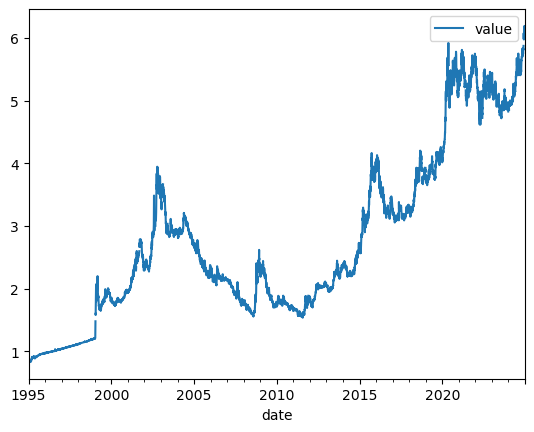

In [50]:
#criando gráfico básico

df_dolar_final.plot()

In [60]:
import matplotlib.pyplot as plt

# mudando esquema de cores

cores = plt.cm.Pastel2.colors

In [67]:
# períodos dos presidentes
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2024-12-20"),
}

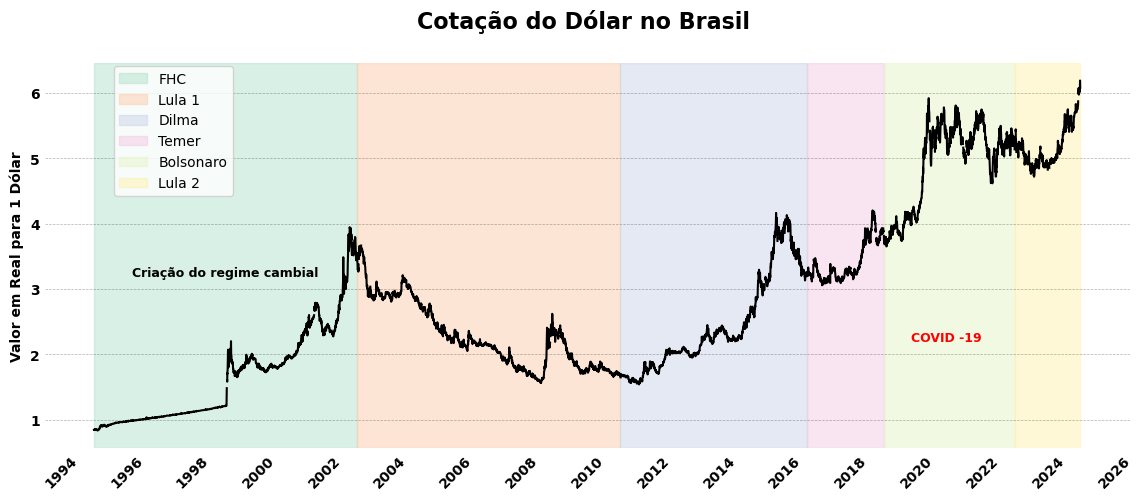

In [600]:
from matplotlib.dates import YearLocator


fig, ax = plt.subplots(figsize = (14,5))

ax.plot(df_dolar_final.index, df_dolar_final['value'], color = 'black')

ax.set_title('Cotação do Dólar no Brasil \n', color = 'black', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Valor em Real para 1 Dólar', color = 'black',fontweight = 'bold')

ax.tick_params(axis = 'y', length = 0)
ax.tick_params(axis = 'x', length = 0)
ax.xaxis.set_major_locator(YearLocator(2))

ax.tick_params(axis='both', labelsize=10)  # Configuração básica

for label in ax.get_xticklabels():
    label.set_fontweight('bold')

for label in ax.get_yticklabels():
    label.set_fontweight('bold')

ax.xaxis.set_tick_params(rotation = 45)
ax.grid(linestyle = '--', linewidth = 0.5, color = 'black', alpha = 0.3, axis = 'y')

for i, presidente in enumerate(presidentes):
    ax.axvspan(presidentes[presidente][0], presidentes[presidente][1], color = cores[i], alpha = 0.5, label = presidente)

legenda = ax.legend().get_frame()

ax.legend(loc='upper right', bbox_to_anchor=(0.18, 1.01))

legenda.set_facecolor('white')  # Cor de fundo
legenda.set_linewidth(1)  # Largura da borda
legenda.set_alpha(1)   # Transparência


ax.text(9550,3.2, 'Criação do regime cambial' , color = 'black', fontweight = 'bold', fontsize = 9)
ax.text(18200,2.2, 'COVID -19' , color = 'red', fontweight = 'bold', fontsize = 9)
    
ax.set_frame_on(False)

plt.show()

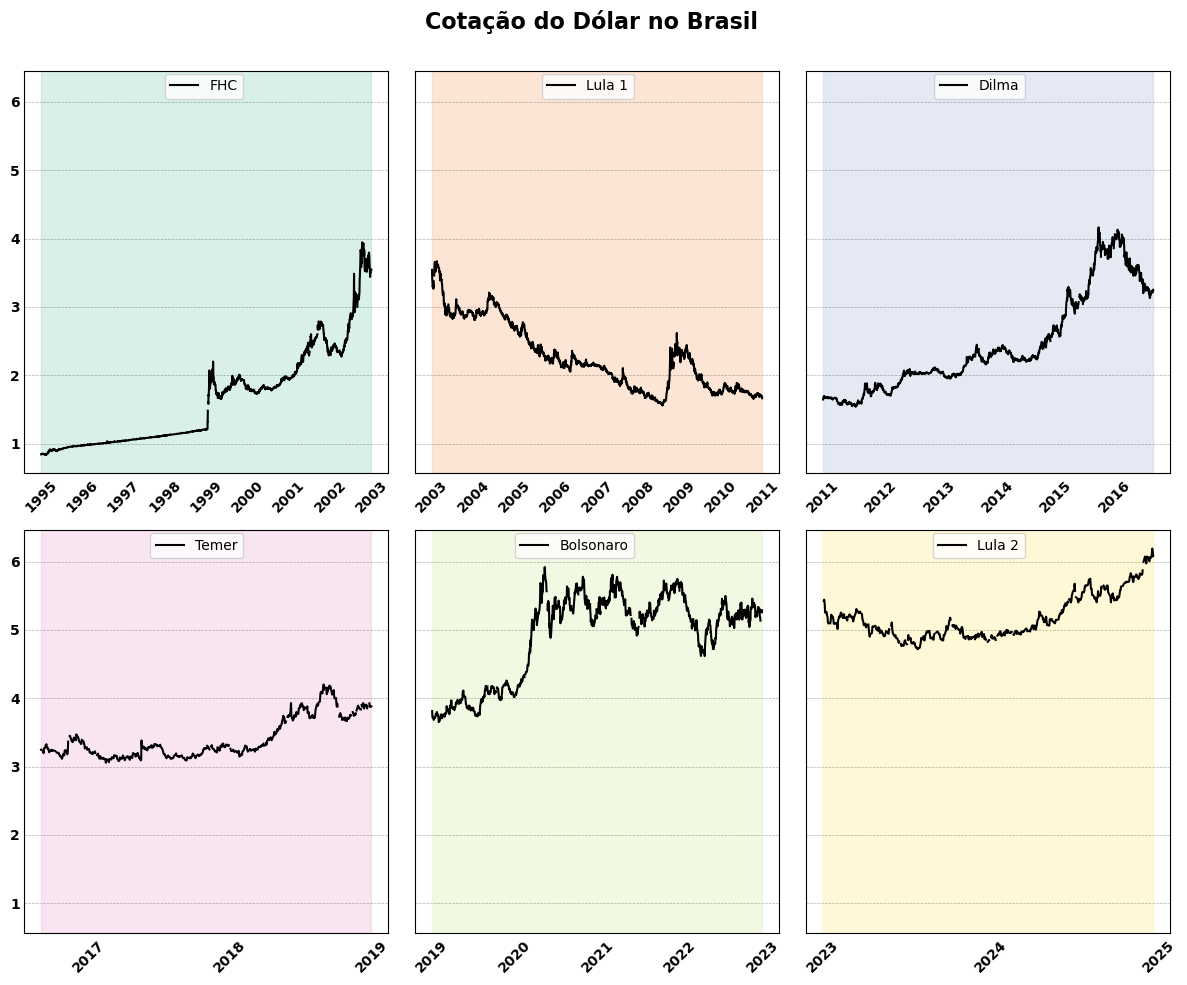

In [587]:
mosaico = 'ABC;DEF'

fig = plt.figure(figsize =(12,10), tight_layout = True)
axs = fig.subplot_mosaic(mosaico, sharey = True)


for i, presidente in enumerate(presidentes):
    
    df_presidente = df_dolar_final.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    mosaico_novo = mosaico.replace(';', '')
    axs[mosaico_novo[i]].plot(df_presidente.index, df_presidente['value'], label = presidente, color = 'black')

    axs[mosaico_novo[i]].axvspan(presidentes[presidente][0], presidentes[presidente][1], color = cores[i], alpha = 0.5)

    axs[mosaico_novo[i]].legend(loc = 'upper right', bbox_to_anchor=(0.62, 1.01))
    
    axs[mosaico_novo[i]].xaxis.set_tick_params(rotation = 45)
    axs[mosaico_novo[i]].xaxis.set_major_locator(YearLocator(1))
    axs[mosaico_novo[i]].tick_params(axis = 'both', length = 0)
    
    axs[mosaico_novo[i]].grid(linestyle = '--', linewidth = 0.5, color = 'black', alpha = 0.3, axis = 'y')

    for label in axs[mosaico_novo[i]].get_xticklabels():
        label.set_fontweight('bold')

    for label in axs[mosaico_novo[i]].get_yticklabels():
        label.set_fontweight('bold')


    
fig.suptitle('Cotação do Dólar no Brasil \n', color = 'black', fontsize = 16, fontweight = 'bold')

plt.show()